In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip show pillow

In [3]:
#!pip install pillow
#!pip install nvidia-ml-py3

In [4]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [5]:
bs = 64

In [6]:
data = ImageDataBunch.from_folder("./data_v3_old/Anime_Recogntn_Images/" , size = 224, valid_pct= 0.15, seed = 42)

In [7]:
data

ImageDataBunch;

Train: LabelList (7431 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v3_old/Anime_Recogntn_Images;

Valid: LabelList (1311 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Toradora,When_They_Cry,Neon_Genesis_Evangelion,City_Hunter,Super_Dimensional_Fortress_Macross
Path: data_v3_old/Anime_Recogntn_Images;

Test: None

In [8]:
path = Path('~./Anime_Project/data_v3_old/Anime_Recogntn_Images')
classes = data.classes
#classes
for c in classes:
    print(c)
    verify_images(path/c, delete=True, size = 500)

In [9]:
#doc(verify_images)

In [10]:
data

ImageDataBunch;

Train: LabelList (7431 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v3_old/Anime_Recogntn_Images;

Valid: LabelList (1311 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Toradora,When_They_Cry,Neon_Genesis_Evangelion,City_Hunter,Super_Dimensional_Fortress_Macross
Path: data_v3_old/Anime_Recogntn_Images;

Test: None

- [ ] Try Transforms.
- [ ] Try Size. Warning triggered when size argument is omitted. data.show_batch errors out without the size argument.
- [ ] Are Data Augmentations and Transforms entirely different things? If yes try Augmentation too.
- [ ] Try Normalization.
### Results:
- Without Transform:
- With Transform:
<hr>
- Without Size:
- With Size (32) :

- [ ] Check fastai notebooks for usual CIFAR10 batch sizes. 
- Size 32 does not look great.
- Size = (16,16), (32,32), (64,64) are not great either. Why do the 32x32 images look bad when CIFAR10 images are 32x32.
- Size = (120,120), (150,150) seem better for the anime images at least.
- Images look bad because 32x32 is really really small.

### data.show_batch errors out when the image sizes are different.

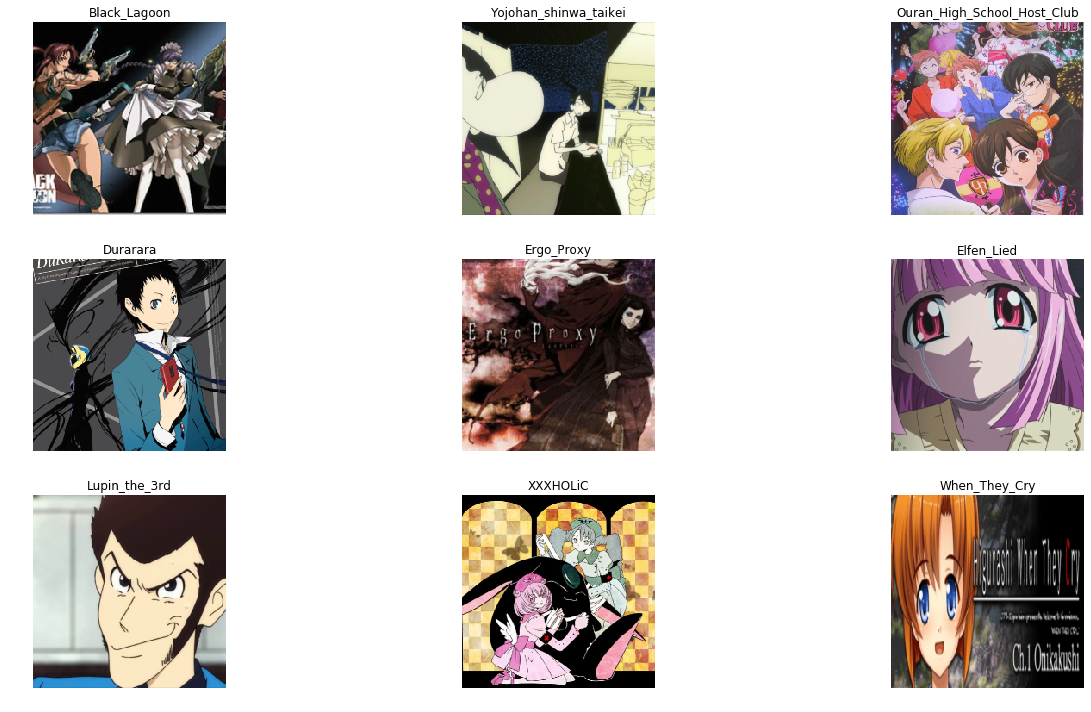

In [11]:
data.show_batch(rows=3, figsize=(20,10))

In [12]:
print(data.classes)
len(data.classes), data.c

['Anne_of_Green_Gables', 'Baccano', 'Bakemonogatari', 'Berserk', 'Black_Lagoon', 'Blood_plus', 'Chobits', 'City_Hunter', 'Clannad', 'Claymore', 'Code_Geass_Lelouch_of_the_Rebellion', 'Cowboy_Bebop', 'Crest_of_the_Stars', 'Darker_Than_Black_Gemini_of_the_Meteor', 'Death_Note', 'Durarara', 'Ef_A_Tale_of_Memories', 'Elfen_Lied', 'Ergo_Proxy', 'Escaflowne', 'Eureka_Seven', 'FLCL', 'Fist_of_the_North_Star', 'Fullmetal_Alchemist', 'Future_Boy_Conan', 'Future_Diary', 'GTO', 'Gambling_Apocalypse_Kaiji', 'Ghost_in_the_Shell_Stand_Alone_Complex', 'Golden_Boy', 'Goodbye_Mr', 'Guardian_of_the_Sacred_Spirit', 'Gungrave', 'Haibane_renmei', 'Hajime_no_ippo', 'Hellsing_Ultimate', 'Hunter_x_Hunter', 'Inuyasha', 'JoJos_Bizarre_Adventure', 'Kaiba', 'Kaleido_Star', 'Katanagatari', 'Kimagure_Orange_Road', 'Kimi_ni_todoke', 'Koi_kaze', 'Legend_of_the_Galactic_Heroes', 'Les_Miserables_Shoujo_Cosette', 'Lupin_the_3rd', 'Maison_Ikkoku', 'Michiko_and_Hatchin', 'Mobile_Suit_Gundam', 'Mononoke', 'Monster', 'Mushi

(97, 97)

In [18]:
"Nodame_Cantabile" in data.classes

False

In [13]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

In [55]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [14]:
learn.fit_one_cycle(4)
learn.recorder.plot_losses()

epoch,train_loss,valid_loss,error_rate,time
0,3.996677,2.882016,0.656751,01:21
1,2.534934,2.029581,0.484363,01:22
2,1.719079,1.821536,0.434783,01:23


KeyboardInterrupt: 

## Error 1 and resolution:
### UnboundLocalError: local variable 'photoshop' referenced before assignment
### Known Pillow Error : https://stackoverflow.com/questions/56587941/unboundlocalerror-local-variable-photoshop-referenced-before-assignment
### Need to downgrade to Pillow 5.4.1, RE INSTALLED Pillow.
<hr>

## Error 2 and resolution:
### OSError: image file is truncated (107 bytes not processed)
### Known Pillow Error : https://stackoverflow.com/questions/12984426/python-pil-ioerror-image-file-truncated-with-big-images
### Added two lines to import:
```python
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
```
<hr>

## Error 3 and resolution:
### AttributeError: 'PngStream' object has no attribute 'chunk_eXIf'
### Known Pillow Error : https://github.com/python-pillow/Pillow/issues/3557
### changed pillow version, installed nvidia-ml-py3:
```python
pip install pillow
pip install nvidia-ml-py3
```
<hr>

In [57]:
learn.save('stage-1-data_v3_1')

# Results:

We will now plot the images where the model was most confused.

In [58]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

len(data.valid_ds) == len(losses) == len(idxs)

True

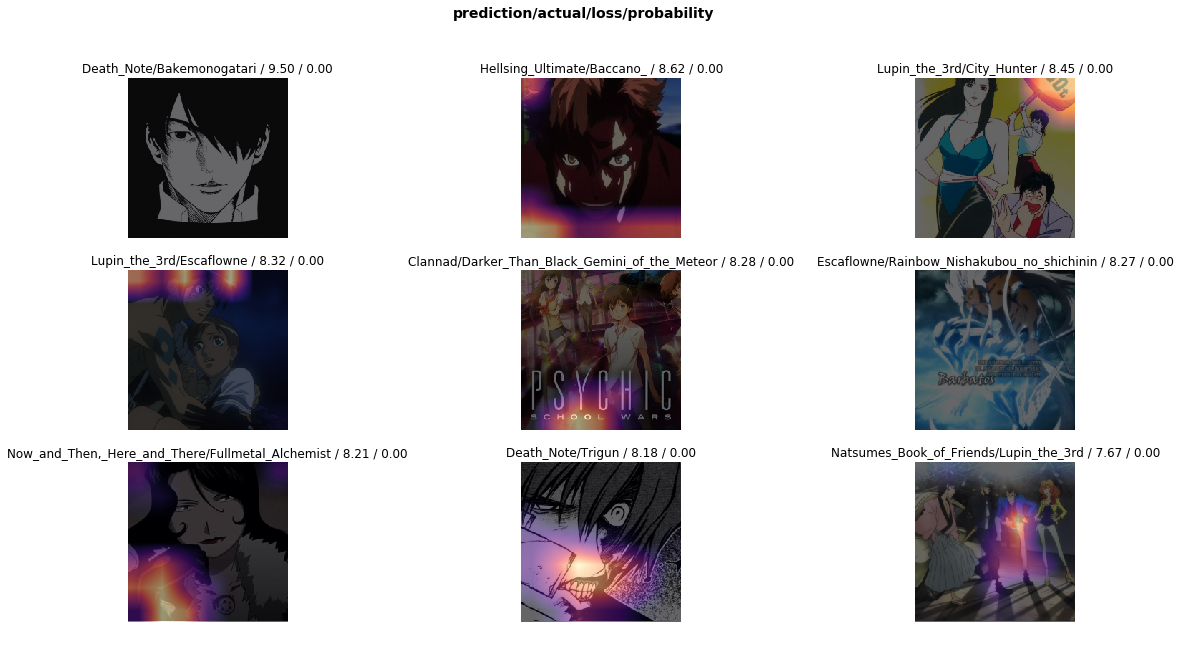

In [59]:
interp.plot_top_losses(9, figsize = (20,10))

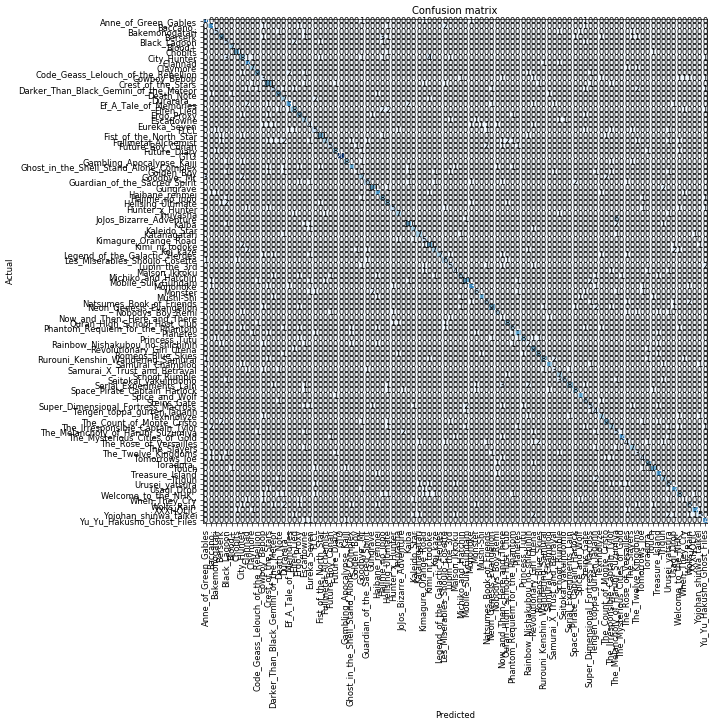

In [60]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [61]:
interp.most_confused(min_val=2)

[('JoJos_Bizarre_Adventure', 'The_Melancholy_of_Haruhi_Suzumiya', 6),
 ('City_Hunter', 'Kimi_ni_todoke', 4),
 ('Berserk', 'Hajime_no_ippo', 3),
 ('City_Hunter', 'Black_Lagoon', 3),
 ('Goodbye,_Mr', 'Anne_of_Green_Gables', 3),
 ('Seitokai_yakuindomo', 'School_Rumble', 3),
 ('Serial_Experiments_Lain', 'Now_and_Then,_Here_and_There', 3),
 ('Baccano_', 'Les_Miserables_Shoujo_Cosette', 2),
 ('Black_Lagoon', 'Elfen_Lied', 2),
 ('Code_Geass_Lelouch_of_the_Rebellion', 'Ef_A_Tale_of_Memories', 2),
 ('Darker_Than_Black_Gemini_of_the_Meteor', 'The_Twelve_Kingdoms', 2),
 ('Durarara__', 'FLCL', 2),
 ('Ef_A_Tale_of_Memories', 'Clannad', 2),
 ('Ef_A_Tale_of_Memories', 'Kaiba', 2),
 ('Elfen_Lied', 'Hajime_no_ippo', 2),
 ('Elfen_Lied', 'Hellsing_Ultimate', 2),
 ('Fullmetal_Alchemist', 'Durarara__', 2),
 ('Fullmetal_Alchemist', 'Ouran_High_School_Host_Club', 2),
 ('Future_Boy_Conan', 'Natsumes_Book_of_Friends', 2),
 ('Goodbye,_Mr', 'City_Hunter', 2),
 ('Goodbye,_Mr', 'The_Count_of_Monte_Cristo', 2),
 ('

# Unfreezing, fine-tuning, and learning rates

If our model is working as expected, we will unfreeze our model and train some more.

In [62]:
learn.unfreeze()

epoch,train_loss,valid_loss,error_rate,time
0,1.217185,1.658151,0.400000,01:31
1,1.131925,2.199624,0.506513,01:29
2,1.223901,2.306905,0.528736,01:30
3,0.880178,2.130783,0.485057,01:32
4,0.533710,2.081341,0.441379,01:29
5,0.246736,1.671706,0.360920,01:30
6,0.117174,1.598055,0.339464,01:30
7,0.052611,1.493849,0.304981,01:31
8,0.031366,1.445720,0.304981,01:30
9,0.022044,1.433528,0.301916,01:33


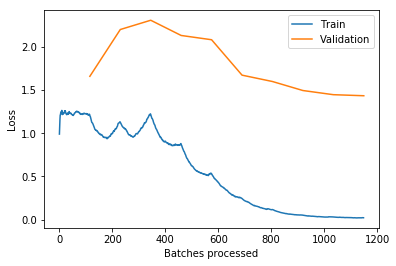

In [63]:
learn.fit_one_cycle(10)
learn.recorder.plot_losses()

In [64]:
learn.save('stage-1-data_v3_2')

In [65]:
#learn.load('stage-1-data_v3_1');

### Since post - unfreeze error is smaller, we'll use this learner.

In [66]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


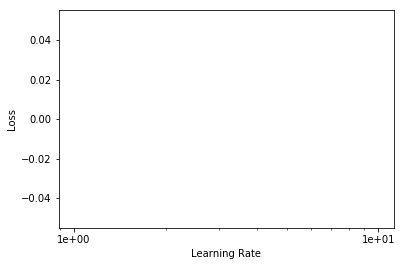

In [67]:
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,0.468210,2.224069,0.456705,01:31
1,0.219997,1.592904,0.325671,01:29


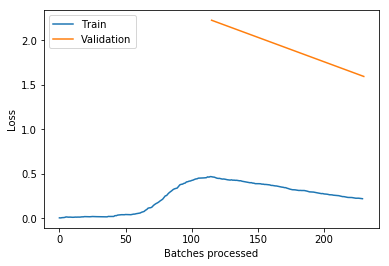

In [68]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-4, 1e-3))
learn.recorder.plot_losses()

In [69]:
learn.save('stage-1-data_v3_3')
#learn.load('stage-1-data_v3_1');

#  Trying resnet50 with bigger images and half the batch size:

In [92]:
data = ImageDataBunch.from_folder("./data_v3_old/Anime_Recogntn_Images/" , size = 300, valid_pct= 0.15, seed = 42, bs = bs//2)

### If the size parameter is set to say 64 instead of 200+ the network will not converge.

In [93]:
learn = cnn_learner(data, models.resnet50, metrics = error_rate)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


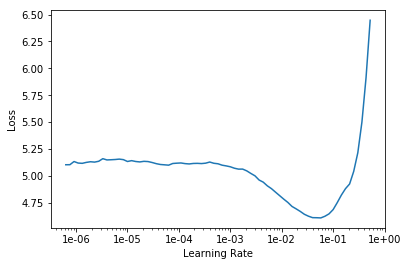

In [90]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,time
0,2.668308,1.875595,0.439847,01:44
1,2.270162,2.009962,0.479693,01:48
2,1.906159,1.726904,0.416092,01:49
3,1.534484,1.534565,0.370881,01:51
4,1.143285,1.310779,0.324138,01:47
5,0.688926,1.230238,0.283525,01:51
6,0.329979,1.205372,0.275096,01:46
7,0.236265,1.191770,0.270498,01:48


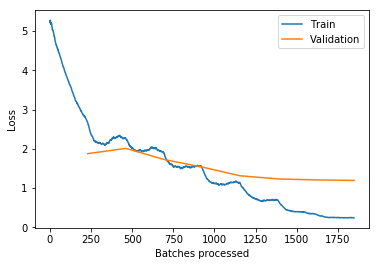

In [94]:
learn.fit_one_cycle(8, max_lr=slice(1e-3,1e-2))
learn.recorder.plot_losses()

### For above, the lowest error rate with max_lr=slice(1e-2,1e-1) is 79%.

In [95]:
learn.save('stage-1-50-data_v3_1')

In [96]:
learn.load('stage-1-50-data_v3_1')

Learner(data=ImageDataBunch;

Train: LabelList (7400 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v3/Anime_Recogntn_Images;

Valid: LabelList (1305 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Baccano_,Katanagatari,Ouran_High_School_Host_Club,Rurouni_Kenshin_Wandering_Samurai,Mushi-Shi
Path: data_v3/Anime_Recogntn_Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), 

epoch,train_loss,valid_loss,error_rate,time
0,1.740332,2.756459,0.568582,01:49
1,2.357212,2.778631,0.622989,01:49
2,2.406950,3.412402,0.723372,01:50
3,2.541656,2.931545,0.699617,01:50
4,2.387906,2.786490,0.659004,01:49
5,2.143581,2.645916,0.613793,01:50
6,1.759973,2.263300,0.557854,01:51
7,1.477359,2.032955,0.481226,01:52
8,1.151603,1.834821,0.419923,01:52
9,0.784610,1.867106,0.411494,01:50


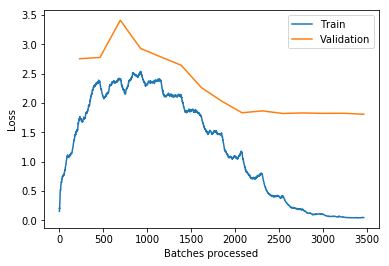

In [97]:
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-3,1e-2))
learn.recorder.plot_losses()

<hr>

### Trial 1:
Arch = Resnet50 <br>
Error = 24.29% <br>
Size = 250 <br>
Epochs = 15 (initial frozen epochs = 8) <br>
lr= max_lr=slice(1e-4,1e-3) (Initial frozen epochs lr unspecified) <br>
<hr>

<hr>

### Trial 2:
Arch = Resnet50 <br>
Error = __ <br>
Size = 300 <br>
Epochs = 15 (initial frozen epochs = 8) <br>
lr= max_lr=slice(1e-4,1e-3) (Initial frozen epochs max_r=slice(1e-3,1e-2)) <br>
<hr>

In [80]:
learn.save('stage-1-50-data_v3_2')

In [99]:
learn.load('stage-1-50-data_v3_1')

Learner(data=ImageDataBunch;

Train: LabelList (7400 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v3/Anime_Recogntn_Images;

Valid: LabelList (1305 items)
x: ImageList
Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300),Image (3, 300, 300)
y: CategoryList
Baccano_,Katanagatari,Ouran_High_School_Host_Club,Rurouni_Kenshin_Wandering_Samurai,Mushi-Shi
Path: data_v3/Anime_Recogntn_Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), 

epoch,train_loss,valid_loss,error_rate,time
0,0.273300,1.237389,0.275096,01:51
1,0.716946,1.590506,0.350958,01:54
2,1.030057,2.038552,0.420690,01:52
3,1.113338,1.751074,0.396935,01:50
4,0.917260,1.666048,0.363985,01:51
5,0.693194,1.660202,0.367050,01:56
6,0.445546,1.523820,0.350192,01:51
7,0.307626,1.324942,0.298851,01:52
8,0.178042,1.211411,0.278161,01:52
9,0.109581,1.197995,0.263602,01:52


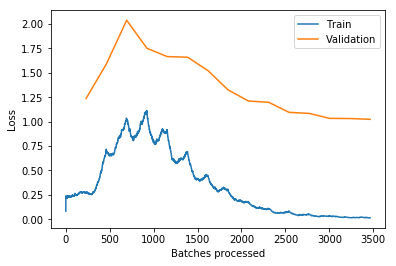

In [100]:
learn.unfreeze()
learn.fit_one_cycle(15, max_lr=slice(1e-4,1e-3))
learn.recorder.plot_losses()

In [ ]:
### Trial 2:
Arch = Resnet50 <br>
Error = 23.83 <br>
Size = 300 <br>
Epochs = 15 (initial frozen epochs = 8) <br>
<hr>

In [102]:
learn.save('stage-1-50-data_v3_3_23_83_percent_error')

In [86]:
learn.load('stage-1-50-data_v3_3')

Learner(data=ImageDataBunch;

Train: LabelList (7400 items)
x: ImageList
Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250)
y: CategoryList
Berserk,Berserk,Berserk,Berserk,Berserk
Path: data_v3/Anime_Recogntn_Images;

Valid: LabelList (1305 items)
x: ImageList
Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250),Image (3, 250, 250)
y: CategoryList
Baccano_,Katanagatari,Ouran_High_School_Host_Club,Rurouni_Kenshin_Wandering_Samurai,Mushi-Shi
Path: data_v3/Anime_Recogntn_Images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), 